# Case study on Supervised learning

### Do the following in the iris dataset.

## 1. Read the dataset to the python environment.

In [141]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
#importing data
data=pd.read_excel(r"C:\Users\Bazil\Downloads\iris.xls")

In [143]:
#viewing data
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#shape of the data set
data.shape

(150, 5)

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2. Do necessary pre-processing steps.

In [164]:
#checking null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

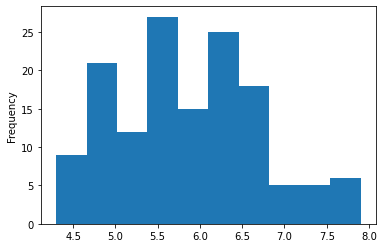

In [8]:
data["SL"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

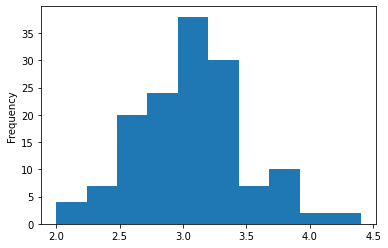

In [9]:
data["SW"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

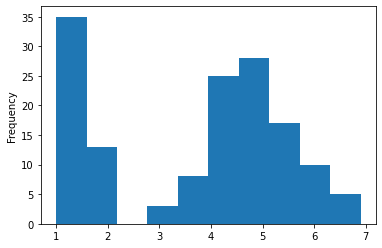

In [10]:
data["PL"].plot(kind="hist")

In [145]:
#filling missing values with median
data["SL"]=data["SL"].fillna(data["SL"].median())
data["SW"]=data["SW"].fillna(data["SW"].median())
data["PL"]=data["PL"].fillna(data["PL"].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Insight

Null values are filled

In [146]:
data["Classification"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

### Label Encoding

In [147]:
#performing label encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data["Classification"]=label_en.fit_transform(data["Classification"])

In [17]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
data["Classification"].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


#### Insight

Dtype of Classification changed to int after label encoding

## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [20]:
corr=data.corr()

<AxesSubplot:>

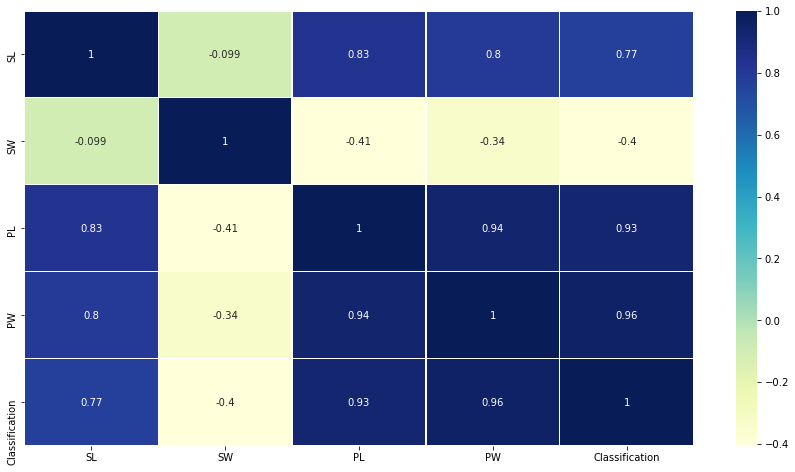

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,cmap="YlGnBu",annot=True,linewidths=0.2)

In [165]:
#splitting data
x=data.drop("Classification",axis=1)
y=data["Classification"]

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [58]:
x_train.shape

(105, 4)

In [59]:
y_train.shape

(105,)

In [60]:
x_test.shape

(45, 4)

In [61]:
y_test.shape

(45,)

## Logistic Regression

In [113]:
# performing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [114]:
lr_model=LogisticRegression()

In [115]:
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

In [166]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))
print("precision_score is ",precision_score(y_test,y_pred,average="macro"))
print("recall_score is ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is ",f1_score(y_test,y_pred,average='macro'))

Accuracy score is  1.0
precision_score is  1.0
recall_score is  1.0
f1_score is  1.0


#### Standard scaling

In [167]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [168]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [169]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))
print("precision_score is ",precision_score(y_test,y_pred,average="macro"))
print("recall_score is ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is ",f1_score(y_test,y_pred,average='macro'))

Accuracy score is  0.9333333333333333
precision_score is  0.9375
recall_score is  0.923076923076923
f1_score is  0.9220389805097451


#### Insight

After scaling accuracy get reduced.

## KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
acc_values=[]
neighbors=np.arange(3,5)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [123]:
acc

1.0

In [124]:
print("precision_score is ",precision_score(y_test,y_pred,average="macro"))
print("recall_score is ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is ",f1_score(y_test,y_pred,average='macro'))

precision_score is  1.0
recall_score is  1.0
f1_score is  1.0


#### Insight

KNN have full accuracy

## SVM

#### Linear

In [160]:
from sklearn.svm import SVC
svm_linear=SVC(kernel="linear")
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [161]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))
print("precision_score is ",precision_score(y_test,y_pred,average="macro"))
print("recall_score is ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is ",f1_score(y_test,y_pred,average='macro'))

Accuracy score is  1.0
precision_score is  1.0
recall_score is  1.0
f1_score is  1.0


#### Insight

Linear SVM gave full accuracy

#### Polynomial

In [157]:
svm_poly=SVC(kernel="poly",degree=3)

In [158]:
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [159]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))
print("precision_score is ",precision_score(y_test,y_pred,average="macro"))
print("recall_score is ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is ",f1_score(y_test,y_pred,average='macro'))

Accuracy score is  0.9777777777777777
precision_score is  0.9761904761904763
recall_score is  0.9743589743589745
f1_score is  0.974320987654321


#### Radial

In [154]:
svm_radial=SVC(kernel="rbf")

In [155]:
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [156]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))
print("precision_score is ",precision_score(y_test,y_pred,average="macro"))
print("recall_score is ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is ",f1_score(y_test,y_pred,average='macro'))

Accuracy score is  0.9777777777777777
precision_score is  0.9761904761904763
recall_score is  0.9824561403508771
f1_score is  0.9786453119786453


#### Insight

 Linear SVM have more accuracy

### Decision Tree

In [171]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [172]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))
print("precision_score is ",precision_score(y_test,y_pred,average="macro"))
print("recall_score is ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is ",f1_score(y_test,y_pred,average='macro'))

Accuracy score is  0.8444444444444444
precision_score is  0.8833333333333333
recall_score is  0.8205128205128206
f1_score is  0.8064859117490696


## Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [153]:
print("Accuracy score is ",accuracy_score(y_test,y_pred))
print("precision_score is ",precision_score(y_test,y_pred,average="macro"))
print("recall_score is ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is ",f1_score(y_test,y_pred,average='macro'))

Accuracy score is  1.0
precision_score is  1.0
recall_score is  1.0
f1_score is  1.0


### Insight

>Random Forest also gave full accuracy

>Most of the models are giving full accuracy